In [1]:
from time import time
from giskard_vision.landmark_detection.dataloaders.loaders import DataLoader300W
from giskard_vision.landmark_detection.dataloaders.wrappers import CroppedDataLoader, CachedDataLoader
from giskard_vision.landmark_detection.marks.facial_parts import FacialParts
from giskard_vision.landmark_detection.visualisation.draw import draw_marks
from giskard_vision.landmark_detection.tests.performance import *
from giskard_vision.landmark_detection.marks.utils import compute_d_outers
from giskard_vision.landmark_detection.models.base import PredictionResult
import numpy as np

In [2]:
ds = DataLoader300W(dir_path="../datasets/300W/sample", batch_size=2)

## Visualizing the `radius_limit` 
`radius_limit` is defined as a fraction of the outer canthal distance (i.e. the distance between left and right eyes)

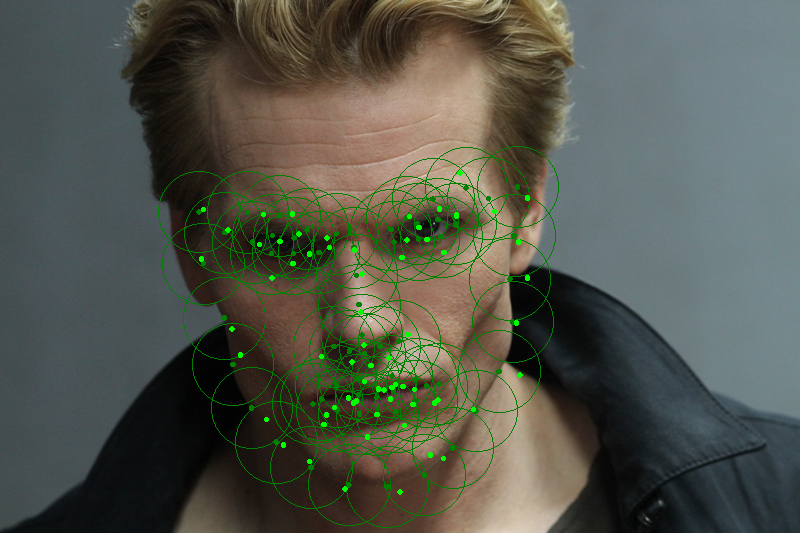

In [3]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.2
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

## Visualizing failing marks predictions 


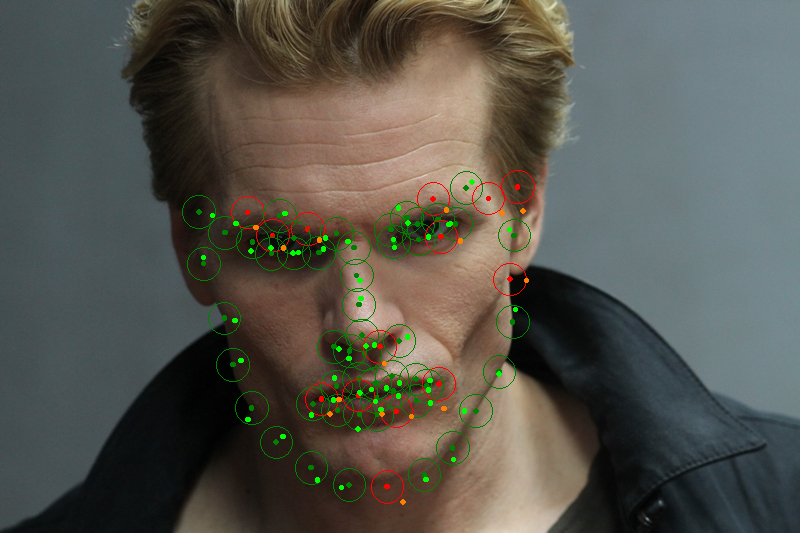

In [4]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.08
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

## Landmark-level available metrics

In [5]:
NEs.get(noisy_preds, marks)

array([[0.10837655, 0.04312582, 0.15443575, 0.05013931, 0.12573295,
        0.09596855, 0.11677335, 0.15758642, 0.10139815, 0.04685083,
        0.1386636 , 0.09340554, 0.15234152, 0.10515951, 0.00642734,
        0.03235309, 0.13835918, 0.08622262, 0.12431439, 0.06462509,
        0.14204053, 0.07762035, 0.1671284 , 0.04406013, 0.09525968,
        0.00159363, 0.11730239, 0.02890469, 0.15753702, 0.02521017,
        0.114248  , 0.06947566, 0.06970773, 0.01802709, 0.10738344,
        0.04829567, 0.0795513 , 0.17344372, 0.04961354, 0.01595825,
        0.04714815, 0.08920617, 0.1961801 , 0.0122234 , 0.11982331,
        0.06542496, 0.12573733, 0.04454891, 0.10525162, 0.03734817,
        0.1068697 , 0.02907014, 0.10166729, 0.04446145, 0.01382585,
        0.02316155, 0.1481478 , 0.02712157, 0.07315869, 0.0734493 ,
        0.12162168, 0.03133483, 0.00912447, 0.09395794, 0.14547488,
        0.14367391, 0.12549303, 0.14388202],
       [0.06872591, 0.03002512, 0.05284104, 0.04404892, 0.05990213,
   

In [6]:
NERFMarks.get(noisy_preds, marks, radius_limit=0.05)

array([[1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
        0., 0., 0., 1.]])

In [7]:
NERFImagesMean.get(noisy_preds, marks, radius_limit=0.05)

array([1. , 0. , 1. , 0.5, 1. , 0.5, 1. , 0.5, 1. , 0. , 1. , 1. , 0.5,
       1. , 0.5, 0. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0. ,
       1. , 0. , 0.5, 0. , 1. , 0.5, 0.5, 0. , 1. , 0. , 0.5, 1. , 0.5,
       0. , 0. , 0.5, 0.5, 0. , 1. , 0.5, 1. , 0.5, 1. , 0. , 1. , 0. ,
       1. , 0.5, 0.5, 0.5, 1. , 0. , 1. , 1. , 1. , 0. , 0.5, 0.5, 0.5,
       0.5, 0.5, 1. ])

In [8]:
NERFImagesStd.get(noisy_preds, marks, radius_limit=0.05)

array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0.5,
       0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0.5, 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0.5, 0. , 0.5,
       0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5,
       0.5, 0.5, 0. ])

In [9]:
NERFMarksMean.get(noisy_preds, marks, radius_limit=0.05)

array([0.66176471, 0.54411765])

In [10]:
NERFMarksStd.get(noisy_preds, marks, radius_limit=0.05)

array([0.47310906, 0.49804983])

In [11]:
NERFImages.get(noisy_preds, marks, radius_limit=0.5, failed_mark_ratio=0.1)

0.0

In [12]:
NERFImages.get(noisy_preds, marks, radius_limit=0.05, failed_mark_ratio=0.7)

0.0